In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [231]:
df_claim=pd.read_csv('project11a_insuranceclaim.csv',parse_dates=['Effective To Date'])
df_claim=pd.DataFrame(df_claim)
df_claim

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2011-02-10,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2011-02-12,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2011-02-06,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2011-02-03,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


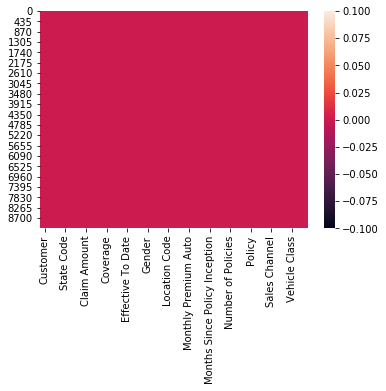

In [232]:
#checking for any missing data
sns.heatmap(df_claim.isnull())

In [233]:
df_claim.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [234]:
for i in df_claim.columns:
    print(df_claim[i].value_counts())

FS67856    1
IK74329    1
LI31082    1
PB31909    1
IE15348    1
          ..
DQ50258    1
CE94751    1
NG13451    1
XS47087    1
BO94261    1
Name: Customer, Length: 9134, dtype: int64
US    9134
Name: Country, dtype: int64
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
472.686933     6
272.535640     6
575.744226     6
592.672938     6
1216.874492    6
              ..
919.868511     1
287.543239     1
623.430592     1
910.389970     1
816.951398     1
Name: Claim Amount, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
2011-01-10    195
2011-01-27    194


In [235]:
#checking data types
df_claim.dtypes
#We can see the attributes are in numerical and categorical form

Customer                                 object
Country                                  object
State Code                               object
State                                    object
Claim Amount                            float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                  

In [236]:
#checking the basic info about the attributes and their counts
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   Country                        9134 non-null   object        
 2   State Code                     9134 non-null   object        
 3   State                          9134 non-null   object        
 4   Claim Amount                   9134 non-null   float64       
 5   Response                       9134 non-null   object        
 6   Coverage                       9134 non-null   object        
 7   Education                      9134 non-null   object        
 8   Effective To Date              9134 non-null   datetime64[ns]
 9   EmploymentStatus               9134 non-null   object        
 10  Gender                         9134 non-null   object        
 11  Income           

In [237]:
#checking the maximum and minimum values of each attribute and their percentiles
df_claim.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Univariate Analysis

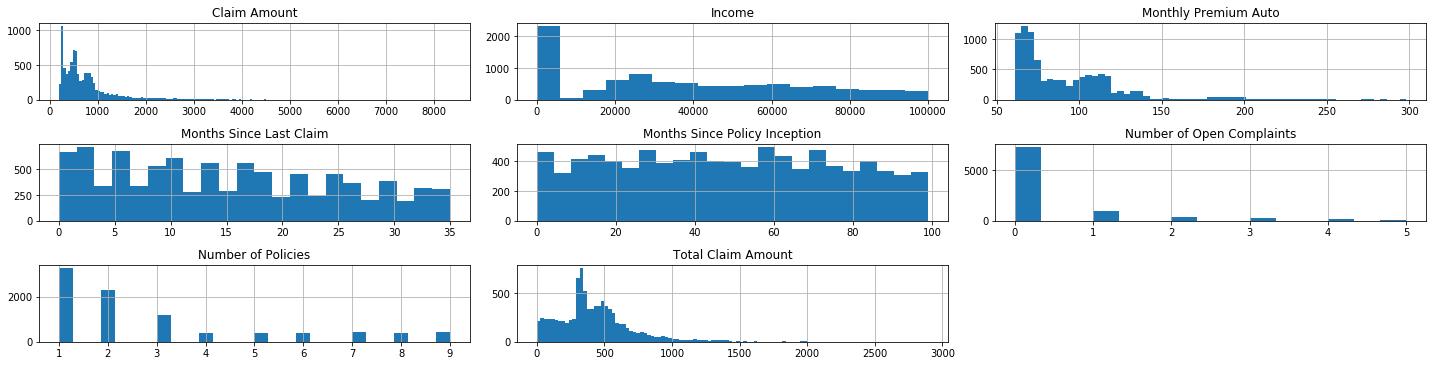

In [238]:
df_claim.hist(figsize = (20,10), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

In [239]:
df_claim.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

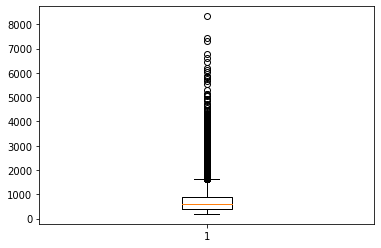

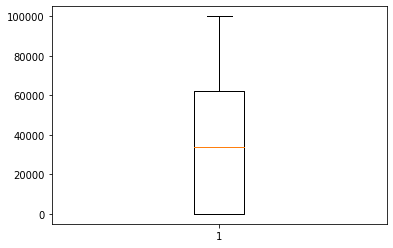

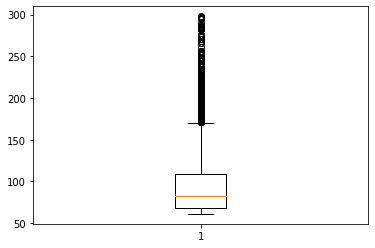

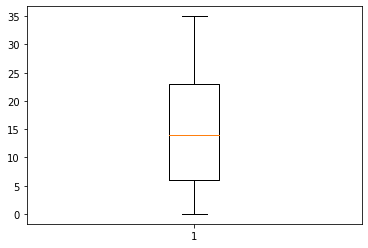

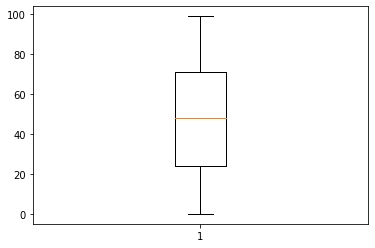

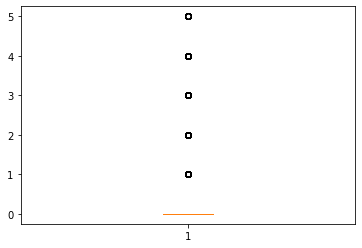

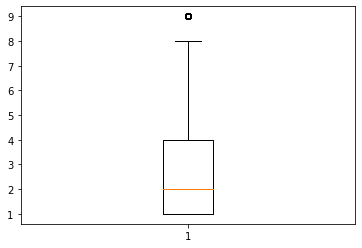

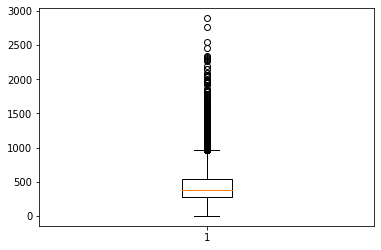

In [240]:
for i in ['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
          'Number of Open Complaints','Number of Policies','Total Claim Amount'] :
    plt.boxplot(df_claim[i])
    plt.show()

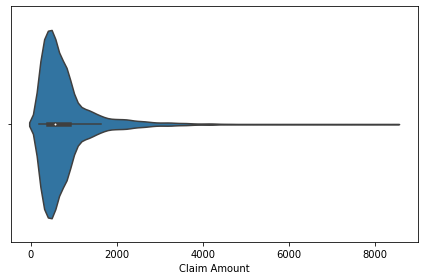

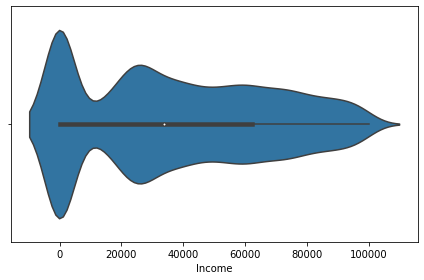

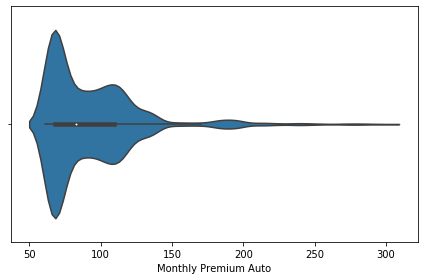

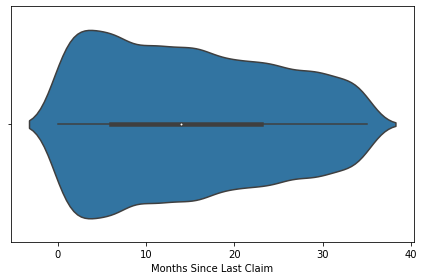

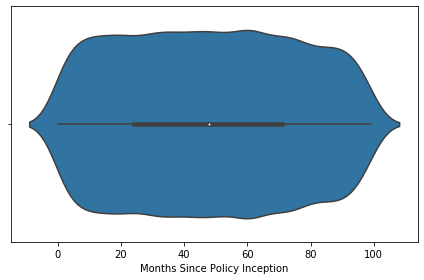

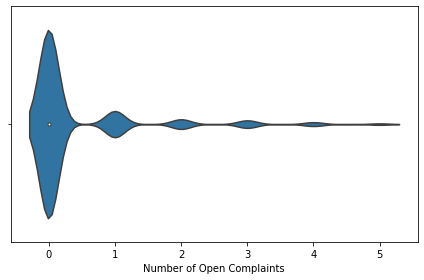

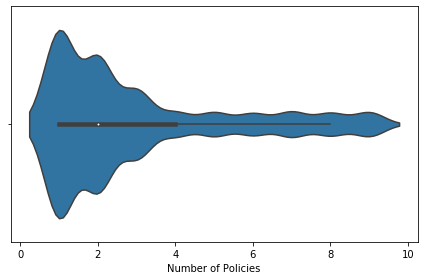

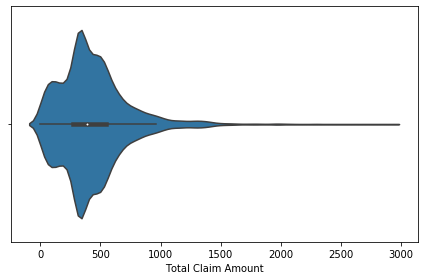

In [241]:
for i in ['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
          'Number of Open Complaints','Number of Policies','Total Claim Amount']:
    sns.violinplot(x=i,data=df_claim)
    plt.tight_layout()
    plt.show()

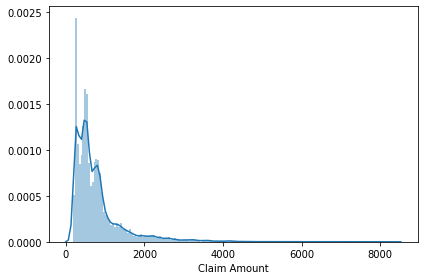

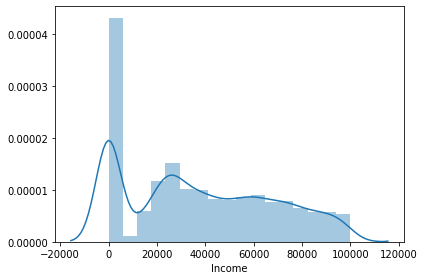

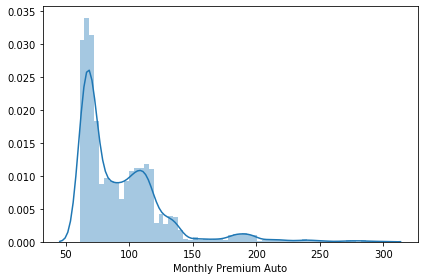

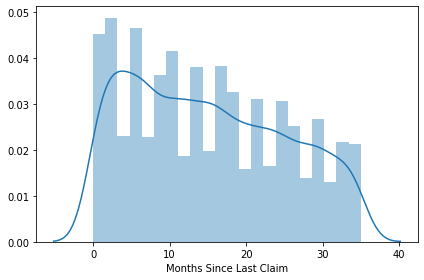

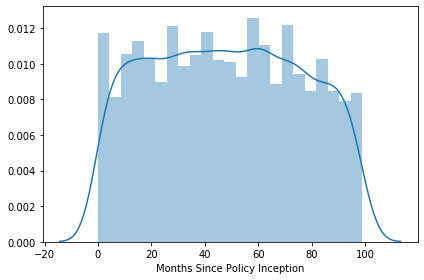

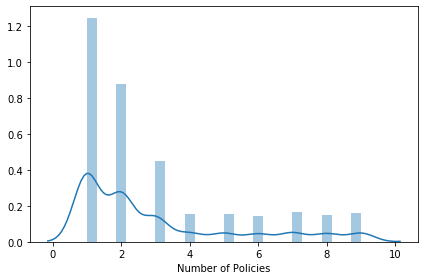

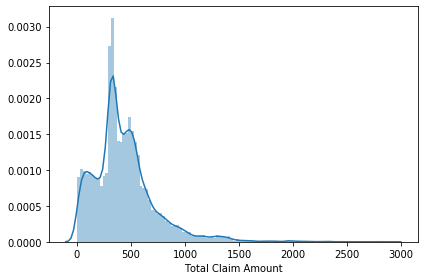

In [242]:
#Checking for the distribution of the data
for i in ['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
          'Number of Policies','Total Claim Amount']:
    sns.distplot(df_claim[i],bins='auto')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

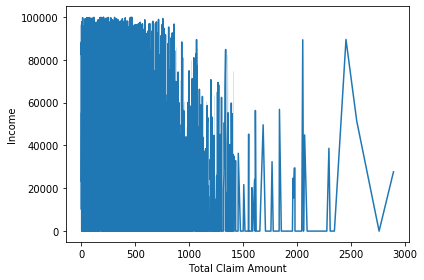

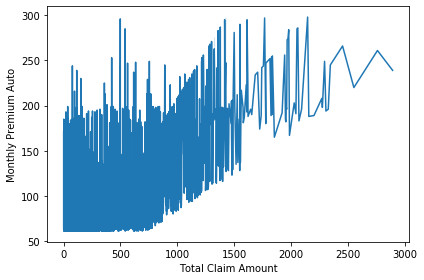

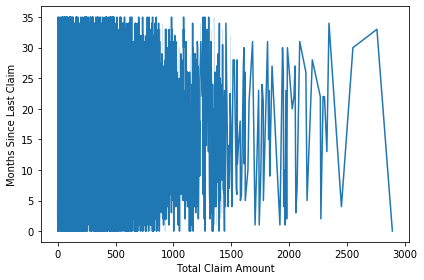

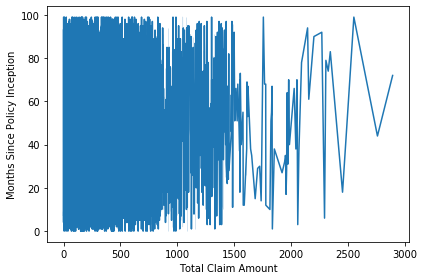

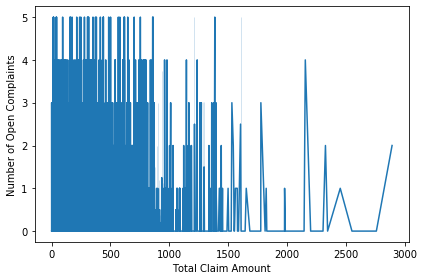

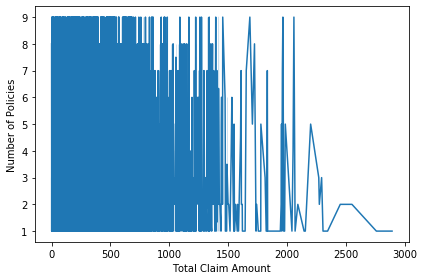

In [243]:
for i in ['Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
          'Number of Open Complaints','Number of Policies']:
    sns.lineplot(df_claim['Total Claim Amount'],df_claim[i])
    plt.tight_layout()
    plt.show()

In [244]:
#Checking the correlation between the attributes
df_claim.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


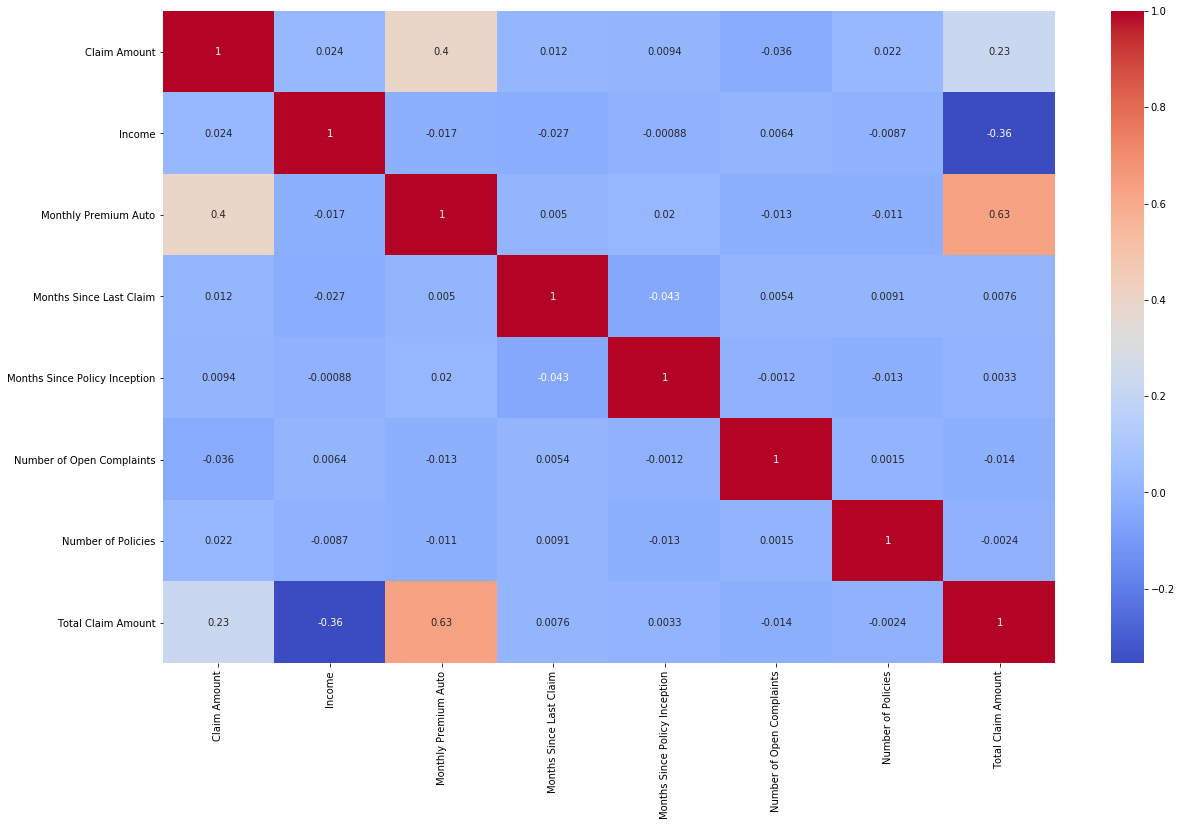

In [245]:
plt.figure(figsize=(20,12))
sns.heatmap(df_claim.corr(),cmap='coolwarm',annot=True)
plt.show()

In [246]:
df_claim.dtypes

Customer                                 object
Country                                  object
State Code                               object
State                                    object
Claim Amount                            float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                  

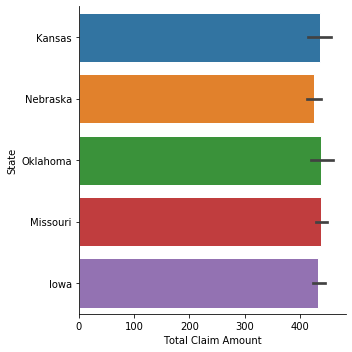

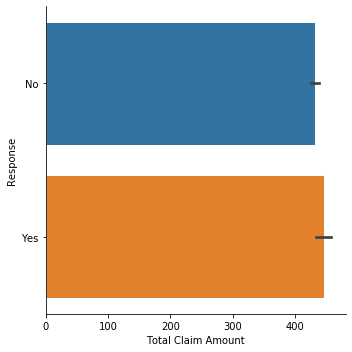

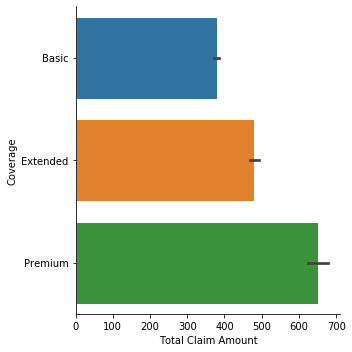

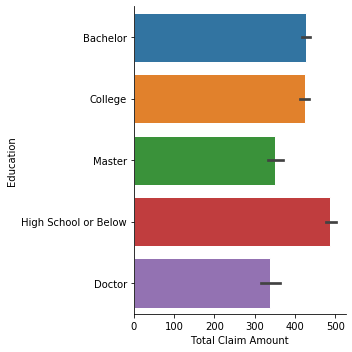

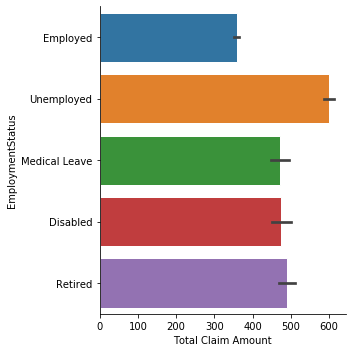

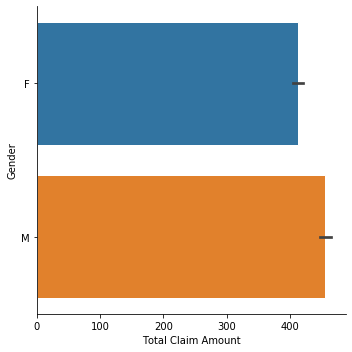

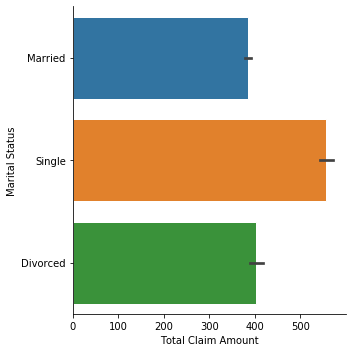

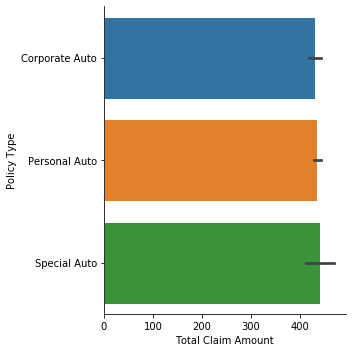

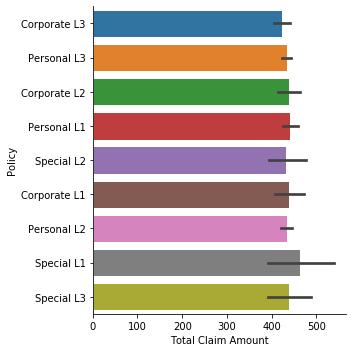

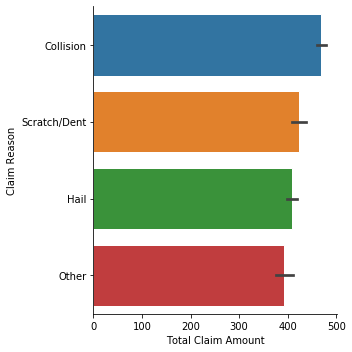

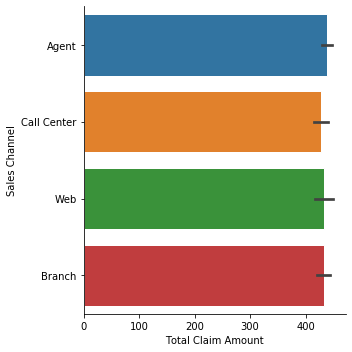

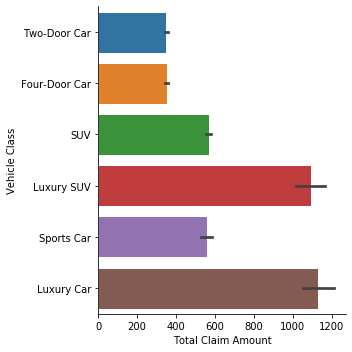

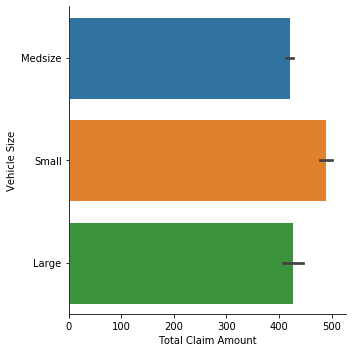

In [247]:
for i in ['State','Response','Coverage','Education','EmploymentStatus','Gender','Marital Status','Policy Type',
'Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']:
    sns.catplot(x='Total Claim Amount',y=i,edgecolor="1",kind='bar',data=df_claim)
    plt.tight_layout()
    plt.show()

# Multivariate Analysis

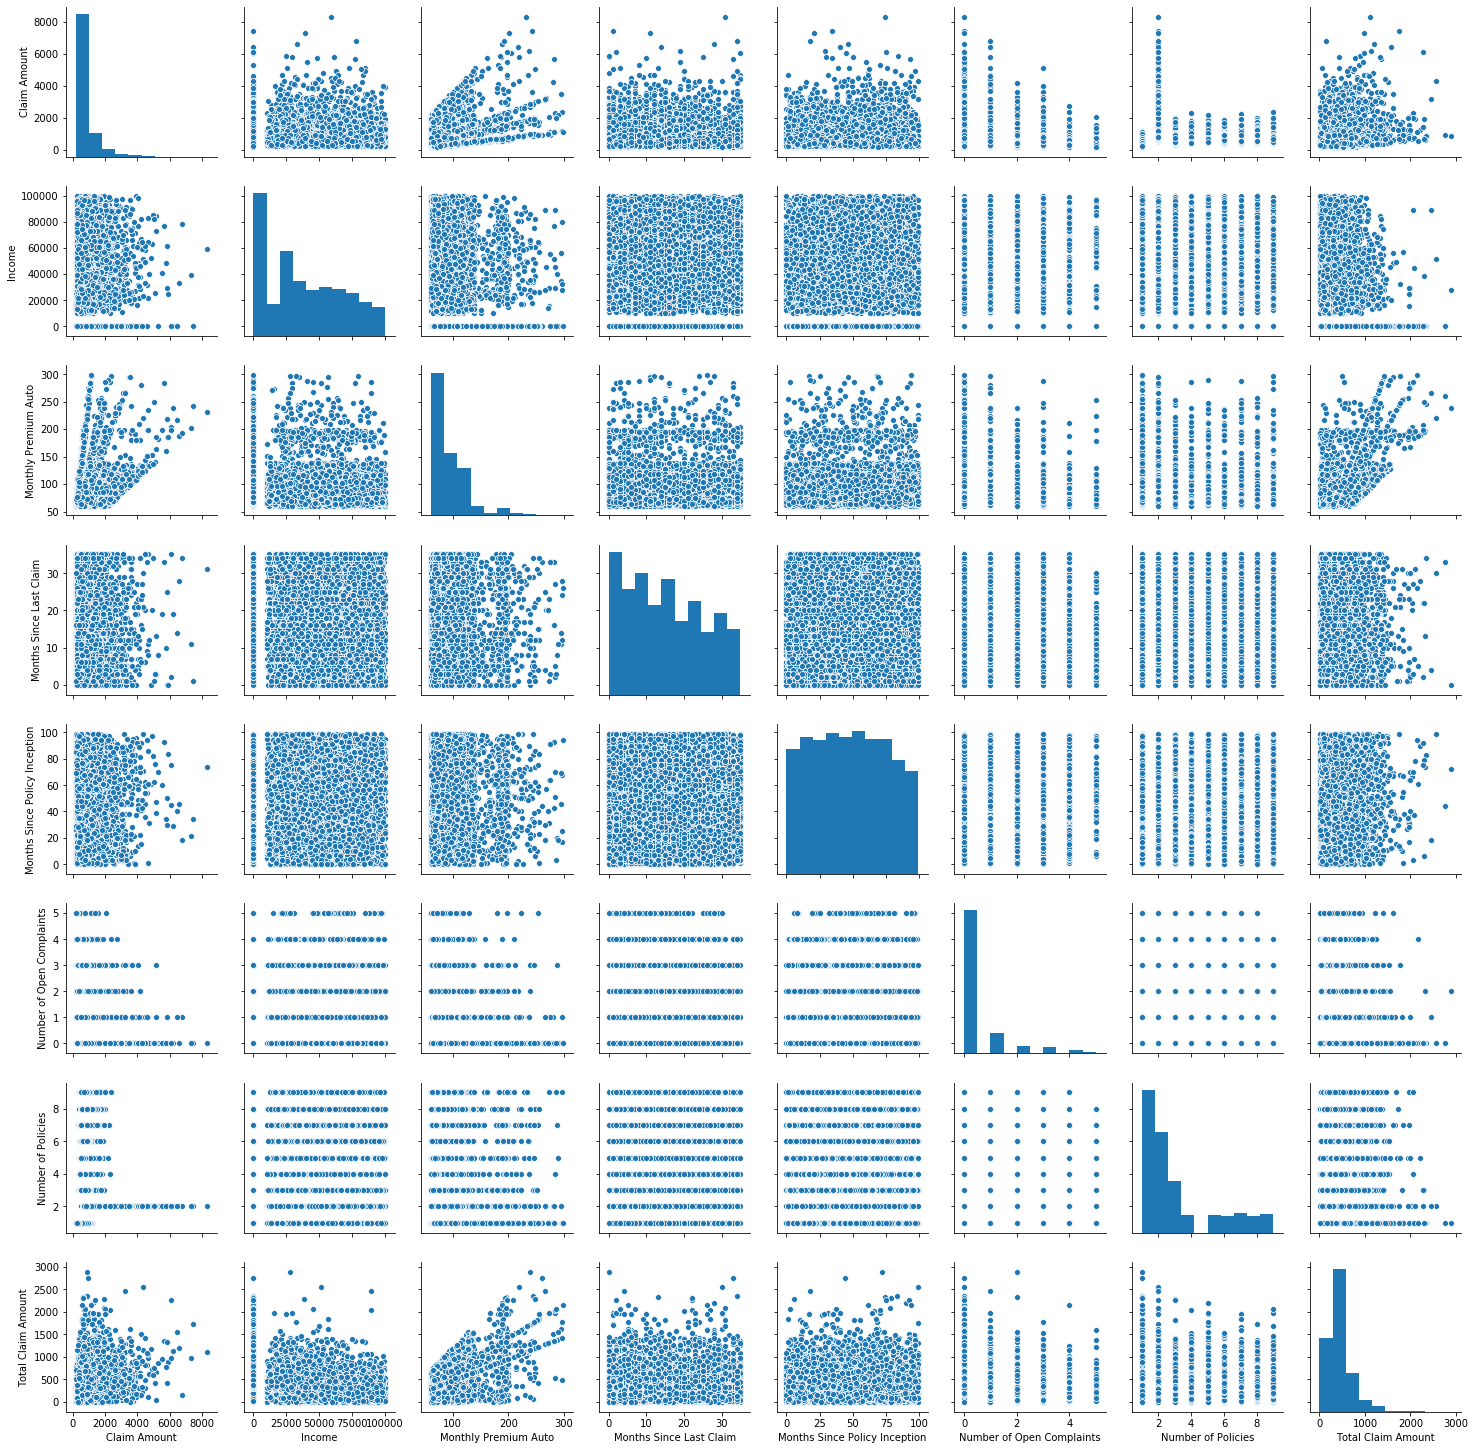

In [248]:
sns.pairplot(df_claim)

In [249]:
df_claim.drop(['Customer', 'Country', 'State Code','Effective To Date','Location Code','Months Since Last Claim','Months Since Policy Inception','Number of Policies'],axis=1,inplace=True)

In [250]:
df_claim.columns

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Marital Status',
       'Monthly Premium Auto', 'Number of Open Complaints', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [251]:
for i in df_claim.columns:
    print(df_claim[i].value_counts())

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
472.686933     6
272.535640     6
575.744226     6
592.672938     6
1216.874492    6
              ..
919.868511     1
287.543239     1
623.430592     1
910.389970     1
816.951398     1
Name: Claim Amount, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1

In [252]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_claim['Policy']=le.fit_transform(df_claim['Policy'])

In [253]:
df_claim=pd.get_dummies(df_claim)

In [254]:
df_claim

,Claim Amount,Income,Monthly Premium Auto,Number of Open Complaints,Policy,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,276.351928,56274,69,0,2,384.811147,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,697.953590,0,94,0,5,1131.464935,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1288.743165,48767,108,0,5,566.472247,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,764.586183,0,106,0,1,529.881344,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,281.369258,43836,73,0,3,138.130879,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2340.598798,71941,73,0,3,198.234764,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
9130,309.651122,21604,79,0,2,379.200000,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,816.389043,0,85,3,1,790.784983,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,752.444244,21941,96,0,4,691.200000,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [255]:
df_claim.skew()

Claim Amount                      3.032280
Income                            0.286887
Monthly Premium Auto              2.123546
Number of Open Complaints         2.783263
Policy                           -0.427639
Total Claim Amount                1.714966
State_Iowa                        0.954022
State_Kansas                      2.923123
State_Missouri                    0.652860
State_Nebraska                    1.610436
State_Oklahoma                    2.732278
Response_No                      -2.037567
Response_Yes                      2.037567
Coverage_Basic                   -0.449361
Coverage_Extended                 0.871991
Coverage_Premium                  2.861258
Education_Bachelor                0.868583
Education_College                 0.907014
Education_Doctor                  4.873839
Education_High School or Below    0.941559
Education_Master                  3.068871
EmploymentStatus_Disabled         4.427858
EmploymentStatus_Employed        -0.511300
EmploymentS

In [256]:
df_claim.dtypes

Claim Amount                      float64
Income                              int64
Monthly Premium Auto                int64
Number of Open Complaints           int64
Policy                              int32
Total Claim Amount                float64
State_Iowa                          uint8
State_Kansas                        uint8
State_Missouri                      uint8
State_Nebraska                      uint8
State_Oklahoma                      uint8
Response_No                         uint8
Response_Yes                        uint8
Coverage_Basic                      uint8
Coverage_Extended                   uint8
Coverage_Premium                    uint8
Education_Bachelor                  uint8
Education_College                   uint8
Education_Doctor                    uint8
Education_High School or Below      uint8
Education_Master                    uint8
EmploymentStatus_Disabled           uint8
EmploymentStatus_Employed           uint8
EmploymentStatus_Medical Leave    

In [257]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_claim[['Claim Amount',
'Income','Monthly Premium Auto','Number of Open Complaints','Policy','Total Claim Amount']]))
print(zscore)
print(np.where(zscore>3))
df_claim_final=df_claim[(zscore<3).all(axis=1)]

[[0.76287773 0.61282744 0.70392465 0.42224956 1.11949664 0.16963969]
 [0.14924546 1.23961684 0.02269103 0.42224956 0.7486263  2.400737  ]
 [0.71063622 0.36570978 0.42959581 0.42224956 0.7486263  0.45573376]
 ...
 [0.02313483 1.23961684 0.23889062 2.87324529 1.74220428 1.22793667]
 [0.06993547 0.51735647 0.08082028 0.42224956 0.12591866 0.88511256]
 [0.78495478 1.23961684 0.47140763 0.42224956 1.11949664 0.22200449]]
(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1046, 1046, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1

In [258]:
print('Before removing outliers:',df_claim.shape)
print('After removing outliers:',df_claim_final.shape)

Before removing outliers: (9134, 51)
After removing outliers: (8470, 51)


In [259]:
df_claim_final.skew()

Claim Amount                       1.848796
Income                             0.282827
Monthly Premium Auto               1.330466
Number of Open Complaints          2.574570
Policy                            -0.415012
Total Claim Amount                 0.709643
State_Iowa                         0.955910
State_Kansas                       2.915287
State_Missouri                     0.654524
State_Nebraska                     1.601689
State_Oklahoma                     2.745858
Response_No                       -2.030625
Response_Yes                       2.030625
Coverage_Basic                    -0.505195
Coverage_Extended                  0.903342
Coverage_Premium                   3.015182
Education_Bachelor                 0.855928
Education_College                  0.913981
Education_Doctor                   4.875094
Education_High School or Below     0.947571
Education_Master                   3.069295
EmploymentStatus_Disabled          4.378245
EmploymentStatus_Employed       

In [260]:
#removing skewness using log transform
df_claim_final=np.log1p(df_claim_final[['Claim Amount',
'Income','Monthly Premium Auto','Number of Open Complaints','Policy','Total Claim Amount']])

In [261]:
df_claim_final.skew()
#skewness is reduced

Claim Amount                 0.359738
Income                      -1.117791
Monthly Premium Auto         0.695535
Number of Open Complaints    2.028948
Policy                      -1.628154
Total Claim Amount          -1.930304
dtype: float64

In [262]:
df_loan_final=df_claim_final

In [263]:
#separating into input and output variables
df_x=df_loan_final.drop(columns=['Total Claim Amount'])
y=pd.DataFrame(df_loan_final['Total Claim Amount'])

In [264]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [265]:
#checking the shape
x.shape

(8470, 5)

In [266]:
y.shape

(8470, 1)

In [267]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [268]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.18699944238969146
r2 score corresponding to 43 is 0.18605086793154657
r2 score corresponding to 44 is 0.18802064826347797
r2 score corresponding to 45 is 0.1874266055447089
r2 score corresponding to 46 is 0.21862566443990483
r2 score corresponding to 47 is 0.17152297475949574
r2 score corresponding to 48 is 0.15364287346841443
r2 score corresponding to 49 is 0.1831965293016642
r2 score corresponding to 50 is 0.18702573732004002
r2 score corresponding to 51 is 0.20931045191102626
r2 score corresponding to 52 is 0.17055037655159988
r2 score corresponding to 53 is 0.1827686006078999
r2 score corresponding to 54 is 0.1987090399751006
r2 score corresponding to 55 is 0.16408880704405826
r2 score corresponding to 56 is 0.18049154168268744
r2 score corresponding to 57 is 0.18382002486498383
r2 score corresponding to 58 is 0.19934362349803525
r2 score corresponding to 59 is 0.16066008149310218
r2 score corresponding to 60 is 0.2019318090342097
r2 score correspo

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,26)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 25}

In [270]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=25)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.19147154282555723
r2 score corresponding to 43 is 0.1629132258984628
r2 score corresponding to 44 is 0.1812343052301285
r2 score corresponding to 45 is 0.16670869258679955
r2 score corresponding to 46 is 0.20042599768732805
r2 score corresponding to 47 is 0.14814761031583845
r2 score corresponding to 48 is 0.1501296471518635
r2 score corresponding to 49 is 0.17369963725709725
r2 score corresponding to 50 is 0.19444378154895325
r2 score corresponding to 51 is 0.18139974570134854
r2 score corresponding to 52 is 0.16303309351993578
r2 score corresponding to 53 is 0.1667120564816884
r2 score corresponding to 54 is 0.18388173431592802
r2 score corresponding to 55 is 0.15498154111680285
r2 score corresponding to 56 is 0.16178736756159884
r2 score corresponding to 57 is 0.1764733036003019
r2 score corresponding to 58 is 0.1761290243210314
r2 score corresponding to 59 is 0.14868078015400432
r2 score corresponding to 60 is 0.1851003619099154
r2 score correspond

In [271]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression: 0.18506962633173654
Standard Deviation in r2 score for Linear Regression: 0.013675157120136222

Mean r2 score for KNN Regression: 0.1729652955470793
Standard Deviation in r2 score for KNN Regression: 0.014969343967032008


In [272]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [273]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.0001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.18700032873316308
r2 score corresponding to 43 is 0.18605173568701927
r2 score corresponding to 44 is 0.18803987106696463
r2 score corresponding to 45 is 0.18741261331354442
r2 score corresponding to 46 is 0.218604084309734
r2 score corresponding to 47 is 0.17155338075333848
r2 score corresponding to 48 is 0.15366358042869688
r2 score corresponding to 49 is 0.1832159411131108
r2 score corresponding to 50 is 0.18703258519862398
r2 score corresponding to 51 is 0.2093292591076309
r2 score corresponding to 52 is 0.17056463465435545
r2 score corresponding to 53 is 0.1827578360019021
r2 score corresponding to 54 is 0.19870914201652
r2 score corresponding to 55 is 0.16409280319929587
r2 score corresponding to 56 is 0.1805142040424057
r2 score corresponding to 57 is 0.18381112375654107
r2 score corresponding to 58 is 0.1993350477164877
r2 score corresponding to 59 is 0.16067832805622906
r2 score corresponding to 60 is 0.20192812036902152
r2 score corresponding

In [274]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.18507289190108187
Standard Deviation in r2 score for Lasso Regression: 0.013668598414516505


In [275]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [276]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.18699780585474124
r2 score corresponding to 43 is 0.18605101114214828
r2 score corresponding to 44 is 0.1880240898528467
r2 score corresponding to 45 is 0.1874219731352732
r2 score corresponding to 46 is 0.21862365046468035
r2 score corresponding to 47 is 0.1715299972114318
r2 score corresponding to 48 is 0.15364749131246602
r2 score corresponding to 49 is 0.1832008466405226
r2 score corresponding to 50 is 0.18702679630561636
r2 score corresponding to 51 is 0.2093117210976826
r2 score corresponding to 52 is 0.17055281599361705
r2 score corresponding to 53 is 0.18276934774727427
r2 score corresponding to 54 is 0.19870735177024124
r2 score corresponding to 55 is 0.1640863811852301
r2 score corresponding to 56 is 0.18049571424859
r2 score corresponding to 57 is 0.18381635970902066
r2 score corresponding to 58 is 0.19933967692000842
r2 score corresponding to 59 is 0.1606654419601724
r2 score corresponding to 60 is 0.2019301039825071
r2 score corresponding 

In [277]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.18506993424186496
Standard Deviation in r2 score for Ridge Regression: 0.013674167044777912


In [278]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [281]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=200)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.23428606382287448
Standard Deviation in r2 score for Gradient Boosting Regression: 0.01255818025324537


In [288]:
#checking maximum r2 score corresponding to Gradient Boost
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.24216825814140142
r2 score corresponding to 43 is 0.223373846824086
r2 score corresponding to 44 is 0.2338030998515649
r2 score corresponding to 45 is 0.2382809623383214
r2 score corresponding to 46 is 0.2642292614452453
r2 score corresponding to 47 is 0.22484092227618024
r2 score corresponding to 48 is 0.18554252367800683
r2 score corresponding to 49 is 0.2345428132718671
r2 score corresponding to 50 is 0.243262084958765
r2 score corresponding to 51 is 0.23073192492173167
r2 score corresponding to 52 is 0.2127781490394295
r2 score corresponding to 53 is 0.21626365514909707
r2 score corresponding to 54 is 0.25499322343053366
r2 score corresponding to 55 is 0.2089351817313233
r2 score corresponding to 56 is 0.20077567887950853
r2 score corresponding to 57 is 0.2152392172367873
r2 score corresponding to 58 is 0.23832057898682268
r2 score corresponding to 59 is 0.21088230690197196
r2 score corresponding to 60 is 0.2249751794722903
r2 score corresponding t

In [287]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500],'base_estimator':[lreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.0001,
 'n_estimators': 150}

In [291]:
from sklearn.model_selection import cross_val_score
ada_reg=AdaBoostRegressor(base_estimator=LinearRegression(),learning_rate=0.0001,n_estimators=150)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.18508947812311294
Standard Deviation in r2 score for Ada Boost Regression: 0.013672563291331565


In [292]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.1871007702644477
r2 score corresponding to 43 is 0.18621062159953627
r2 score corresponding to 44 is 0.18783246466544412
r2 score corresponding to 45 is 0.1873933455602893
r2 score corresponding to 46 is 0.2187034954582464
r2 score corresponding to 47 is 0.1713480511048252
r2 score corresponding to 48 is 0.15375789350749947
r2 score corresponding to 49 is 0.18332781812930043
r2 score corresponding to 50 is 0.1868658732598094
r2 score corresponding to 51 is 0.20911531838305986
r2 score corresponding to 52 is 0.17062812927407267
r2 score corresponding to 53 is 0.18279933827930617
r2 score corresponding to 54 is 0.19871935061740287
r2 score corresponding to 55 is 0.1641041825623768
r2 score corresponding to 56 is 0.18085497046937848
r2 score corresponding to 57 is 0.18376840727978005
r2 score corresponding to 58 is 0.1991864162649879
r2 score corresponding to 59 is 0.16054441697716337
r2 score corresponding to 60 is 0.20203165205806228
r2 score correspond

In [283]:
from sklearn.svm import SVR
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.07945612365803356
0.07493339078748118
0.12594174559508564


In [285]:
#Using SVR and checking maxr2 score corresponding to different random states
from sklearn.svm import SVR
SV=SVR(kernel='rbf')
r_state=maxr2_score(SV,x,y)

r2 score corresponding to 42 is 0.1219838780760214
r2 score corresponding to 43 is 0.11291922013354605
r2 score corresponding to 44 is 0.1422730303088755
r2 score corresponding to 45 is 0.10341105724299426
r2 score corresponding to 46 is 0.14600748918185202
r2 score corresponding to 47 is 0.10847348111437172
r2 score corresponding to 48 is 0.08246613682007198
r2 score corresponding to 49 is 0.1399387426976353
r2 score corresponding to 50 is 0.11951992642679632
r2 score corresponding to 51 is 0.14822780014787273
r2 score corresponding to 52 is 0.09570872680944587
r2 score corresponding to 53 is 0.11669778903357975
r2 score corresponding to 54 is 0.12071917738235272
r2 score corresponding to 55 is 0.10019889568483531
r2 score corresponding to 56 is 0.12297320693550384
r2 score corresponding to 57 is 0.10484611613269246
r2 score corresponding to 58 is 0.1205298394293075
r2 score corresponding to 59 is 0.09390573783153078
r2 score corresponding to 60 is 0.1305509276058665
r2 score correspo

In [286]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters={'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 450}

In [289]:
#Using cross val score to check the mean r2 score and standard deviation
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=450)
print("Mean r2 score for RandomForestRegressor:",cross_val_score(rf,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for RandomForestRegressor:',cross_val_score(rf,x,y,cv=5,scoring='r2').std())

Mean r2 score for RandomForestRegressor: 0.2071242065880435
Standard Deviation in r2 score for RandomForestRegressor: 0.009970089283841483


In [290]:
#checking maximum r2 score corresponding to RandomForestRegressor
r_state=maxr2_score(rf,x,y)

r2 score corresponding to 42 is 0.19024703445822
r2 score corresponding to 43 is 0.22967446099049327
r2 score corresponding to 44 is 0.20392153125756218
r2 score corresponding to 45 is 0.23496803966364999
r2 score corresponding to 46 is 0.2525151218550391
r2 score corresponding to 47 is 0.1828410100960668
r2 score corresponding to 48 is 0.1886140399524302
r2 score corresponding to 49 is 0.21036680102164107
r2 score corresponding to 50 is 0.2079394576419581
r2 score corresponding to 51 is 0.20942353641517453
r2 score corresponding to 52 is 0.20447400149218875
r2 score corresponding to 53 is 0.19774341338507062
r2 score corresponding to 54 is 0.2585910548664805
r2 score corresponding to 55 is 0.19663598220174983
r2 score corresponding to 56 is 0.19618770415094822
r2 score corresponding to 57 is 0.17137691248765974
r2 score corresponding to 58 is 0.22271367686642596
r2 score corresponding to 59 is 0.19385096712711614
r2 score corresponding to 60 is 0.2447516996390815
r2 score correspondin

In [293]:
#We tried all methods and till now GradientBoostingRegressor is the best option 
#Random state corresponding to highest r2 score is 84
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [294]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.701000483594052
r2 score is: 0.2705762073540946


In [295]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbr,"Project11a_Claim.pkl")

['Project11a_Claim.pkl']